# 实践案例一 ：LVQ算法的实现

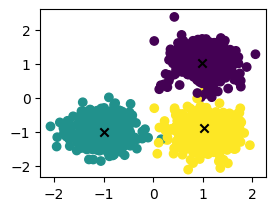

In [2]:
import numpy as np
class LVQ():
    #calculate distance between two vectors
    def euclidean_dist(self, x1, x2):
        dist = np.sqrt(np.sum((x1-x2)**2))
        return dist
    #select the closest protovector of x, return its index
    def get_min_dist_proto_vect(self, proto_vects,x):
        min_dist = np.inf
        min_index = -1
        for i in range(proto_vects.shape[0]):
            dist = self.euclidean_dist(proto_vects[i], x)
            if dist < min_dist:
                min_dist = dist
                min_index = i
        return min_index
    #train LVQ model
    def fit(self,data_x,data_y,proto_vects, proto_labels,learnrate,max_iters):
        iters = 0
        while iters < max_iters:
            #randomly select a training sample
            sample_index = np.random.choice(len(data_x), 1, replace=False)
            #get the index of closest protovector
            min_dist_index = self.get_min_dist_proto_vect(proto_vects,
                                                          data_x[sample_index])
            #update protovector according to labels
            if proto_labels[min_dist_index] == data_y[sample_index]:
                proto_vects[min_dist_index,:] += learnrate*(data_x[sample_index
                                                                   ][0]
                                                            -proto_vects[min_dist_index
                                                                         ,:])
            else:
                proto_vects[min_dist_index,:] += learnrate*(data_x[sample_index
                                                                   ][0]
                                                            -proto_vects[min_dist_index
                                                                         ,:])
            iters += 1
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt
    import random
    # create a data set with three clusters and show data
    fig = plt.figure(1)
    plt.subplot(221)
    center = [[1, 1], [-1, -1], [1, -1]]
    cluster_std = 0.35
    X1, Y1 = make_blobs(n_samples=1000, centers=center,
                        n_features=2, cluster_std=cluster_std, random_state=1)
    plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
    #build LVQ model
    lvq = LVQ()
    rand_index = random.sample(range(len(X1)), 3)
    proto_vects = X1[rand_index,:]
    proto_labels = Y1[rand_index]
    lvq.fit(X1, Y1, proto_vects, proto_labels, 0.01, 1000)
    #show lvq results
    plt.scatter(proto_vects[:,0], proto_vects[:,1], marker='x',c='#000000')
    plt.show()

------

# 实践案例二：DBSCAN算法的实现

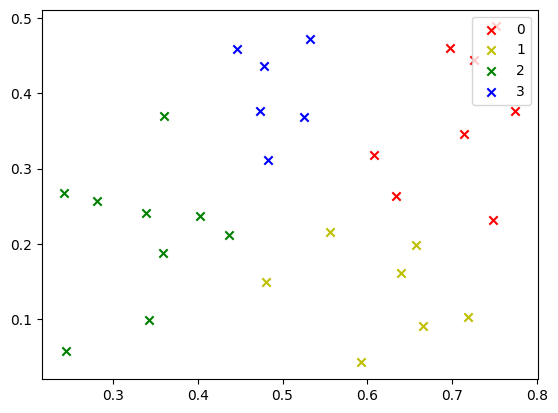

In [1]:
import numpy as np
class AGNES:
    def euclidean_dist(self, x1, x2):
        x = np.array(x1)
        y = np.array(x2)
        return np.linalg.norm(x - y)
    def dist_min(self,C_i,C_j):
        min_dist = np.inf
        for x1 in C_i:
            for x2 in C_j:
                dist = self.euclidean_dist(x1, x2)
                if dist < min_dist:
                    min_dist = dist
        return min_dist
    def dist_max(self,C_i,C_j):
        max_dist = -np.inf
        for x1 in C_i:
            for x2 in C_j:
                dist = self.euclidean_dist(x1, x2)
                if dist > max_dist:
                    max_dist = dist
        return max_dist
    def dist_avg(self,C_i,C_j):
        avg_dist = 0.0
        for x1 in C_i:
            for x2 in C_j:
                dist = self.euclidean_dist(x1, x2)
                avg_dist += dist
        avg_dist = avg_dist/(len(C_i)*len(C_j))
        return avg_dist
    def find_min_dist_pos(self,dist_matrix):
        min_dist = np.inf
        x = 0
        y = 0
        for i in range(len(dist_matrix)):
            for j in range(len(dist_matrix[i])):
                if i!=j and dist_matrix[i][j] < min_dist:
                    min_dist = dist_matrix[i][j]
                    x = i
                    y = j
        return (x,y,min_dist)
    def cal_dist(self, dist_type,x,y):
        dist = 0.0
        if dist_type == 'min':
            dist = self.dist_min(x,y)
        elif dist_type == 'max':
            dist = self.dist_max(x,y)
        else:
            dist = self.dist_avg(x,y)
        return dist
    def fit(self,data,dist_type, k):
        clusters = []
        dist_matrix = []
        for sample in data:
            C_i = []
            C_i.append(sample)
            clusters.append(C_i)
        for x in clusters:
            m_i = []
            for y in clusters:
                dist = self.cal_dist(dist_type, x, y)
                m_i.append(dist)
            dist_matrix.append(m_i)
        q = len(data)
        while q > k:
            x,y,min_dist = self.find_min_dist_pos(dist_matrix)
            clusters[x].extend(clusters[y])
            clusters.remove(clusters[y])
            dist_matrix = []
            for x in clusters:
                m_i = []
                for y in clusters:
                    dist = self.cal_dist(dist_type, x, y)
                    m_i.append(dist)
                dist_matrix.append(m_i)
            q = q - 1
        return clusters
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    data = [(0.697,0.460),(0.774,0.376),(0.634,0.264),(0.608,0.318),(0.556,0.215),
            (0.403,0.237),(0.481,0.149),(0.437,0.211),(0.666,0.091),(0.243,0.267),
            (0.245,0.057),(0.343,0.099),(0.639,0.161),(0.657,0.198),(0.360,0.370),
            (0.593,0.042),(0.719,0.103),(0.359,0.188),(0.339,0.241),(0.282,0.257),
            (0.748,0.232),(0.714,0.346),(0.483,0.312),(0.478,0.437),(0.525,0.369),
            (0.751,0.489),(0.532,0.472),(0.473,0.376),(0.725,0.445),(0.446,0.459)]
    def draw(C):
        colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
        for i in range(len(C)):
            coo_X = []
            coo_Y = []
            for j in range(len(C[i])):
                coo_X.append(C[i][j][0])
                coo_Y.append(C[i][j][1])
            plt.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)
        plt.legend(loc='upper right')
        plt.show()
    #Add code here to use AGNES for clustering
    model = AGNES()
    C = model.fit(data, dist_type='max', k=4)
    draw(C)

---

# 实践案例三：AGNES算法的实现

In [4]:
import numpy as np
class DBSCAN:
    def euclidean_dist(self, x1, x2):
        x = np.array(x1)
        y = np.array(x2)
        return np.linalg.norm(x - y)
    def fit(self,data,neighbor_dist,minpts):
        core_obj = set()
        cluster_num = 0
        clusters = []
        P = set(data)
        for sample in data:
            if len([ sample_i for sample_i in data if self.euclidean_dist(sample
                                                                          , sample_i) <= neighbor_dist]) >= minpts:
                core_obj.add(sample)
        while len(core_obj):
            P_OLD = P
            obj = list(core_obj)[np.random.randint(0, len(core_obj))]
            P = P - set(obj)
            Q = []
            Q.append(obj)
            while len(Q):
                q = Q[0]
                N_q = [sample for sample in data if self.euclidean_dist(sample, q
                                                                        ) <= neighbor_dist]
                if len(N_q) >= minpts:
                    delta = set(N_q) & P
                    Q += (list(delta))
                    P = P - delta
                Q.remove(q)
            cluster_num = cluster_num + 1
            C_k = list(P_OLD - P)
            core_obj = core_obj - set(C_k)
            clusters.append(C_k)
        return clusters
def draw(C):
        colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
        for i in range(len(C)):
            coo_X = []
            coo_Y = []
            for j in range(len(C[i])):
                coo_X.append(C[i][j][0])
                coo_Y.append(C[i][j][1])
            plt.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)
        plt.legend(loc='upper right')
        plt.show()


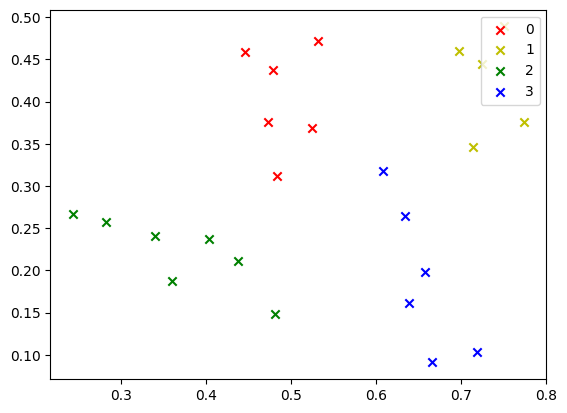

In [5]:
import matplotlib.pyplot as plt
data = [(0.697,0.460),(0.774,0.376),(0.634,0.264),(0.608,0.318),(0.556,0.215),
        (0.403,0.237),(0.481,0.149),(0.437,0.211),(0.666,0.091),(0.243,0.267),
        (0.245,0.057),(0.343,0.099),(0.639,0.161),(0.657,0.198),(0.360,0.370),
        (0.593,0.042),(0.719,0.103),(0.359,0.188),(0.339,0.241),(0.282,0.257),
        (0.748,0.232),(0.714,0.346),(0.483,0.312),(0.478,0.437),(0.525,0.369),
        (0.751,0.489),(0.532,0.472),(0.473,0.376),(0.725,0.445),(0.446,0.459)]

model = DBSCAN()
C = model.fit(data, 0.085, 2)
draw(C)